# Select a fiew star with the color V-I
- Author : Sylvie Dagoret-Campagne
- Creation : April 27th 2020


Must have run **3_ViewCalspecColors.ipynb** before this notebook t compute colors in table

- Last verification : December 14th 2021 -->  OK


In [14]:
import os,sys
import numpy as np

In [15]:
from astropy.table import Table
from astropy.io import fits

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

In [17]:
import pysynphot as S

In [18]:
pysynphot_root_path=os.environ['PYSYN_CDBS']
path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')

In [19]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(12,8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

In [20]:
! ls

1_MakeCalspecList.ipynb                all_viscalspec_relspectra_lin.pdf
1bis_MakeHDCalspecList.ipynb           all_viscalspec_relspectra_lin.png
2_ViewCalspecSpectra.ipynb             all_viscalspec_spectra_lin.pdf
2bis_ViewSelectedCalspecSpectra.ipynb  all_viscalspec_spectra_lin_renorm.png
2quat_ViewSelectedCalspecSpectra.ipynb all_viscalspec_spectra_lin_renorm2.png
2ter_ViewCalspecSpectra.ipynb          all_viscalspec_spectra_log.pdf
3_ViewCalspecColors.ipynb              all_viscalspec_spectra_log.png
4_ViewCalspecObsFlux.ipynb             randomseed
5_SelectFiewColors.ipynb               simulations
IC.DAT                                 table_summary_allcalspec.fits
README.md                              table_summary_allcalspec_torenorm.fits
all_selectedcalspec_spectra_lin.pdf    table_summary_calspec_hd.fits
all_selectedcalspec_spectra_lin_v2.pdf


# Read table with re-calculated magnitudes

In [21]:
t=Table.read('table_summary_allcalspec_torenorm.fits')

In [22]:
t.show_in_notebook()

idx,OBJNAME,RA,DEC,SP_TYPE,SP_QUAL,magU,magB,magV,magR,magI,FILES,calcU,calcB,calcV,calcR,calcI,factor,VmI
0,NGC7293,337.411,-20.837,DAO.5,C,11.894,13.158,13.524,13.689,13.898,ngc7293_005.fits,11.917,13.180,13.538,13.734,14.234,26.01,-0.697
1,FEIGE67,190.466,17.522,sdOpec,D,10.261,11.700,11.630,11.969,12.159,feige67_002.fits,10.256,11.478,11.811,11.987,12.463,5.3027,-0.652
2,GD50,57.209,-0.976,DA1.2,C,12.596,13.787,14.063,14.210,14.388,gd50_004.fits,12.674,13.817,14.043,14.217,14.674,41.416,-0.631
3,FEIGE66,189.348,25.067,sdB1(k),C,9.117,10.260,10.590,10.642,10.809,feige66_002.fits,9.123,10.225,10.487,10.642,11.096,1.5662,-0.609
4,GD108,150.197,-7.559,sdB,D,12.406,13.349,13.563,13.662,13.781,gd108_005.fits,12.412,13.347,13.558,13.659,14.073,26.488,-0.516
5,G93-48,328.106,2.389,DA2.8,C,11.942,12.732,12.743,12.839,12.938,g93_48_004.fits,11.982,12.717,12.728,12.836,13.234,12.34,-0.506
6,HZ2,63.181,11.864,DA2.3,C,12.903,13.787,13.877,13.984,14.094,hz2_005.fits,12.943,13.792,13.849,13.949,14.339,34.649,-0.490
7,HZ44,200.897,36.133,sdBN0VIIHe28,B,10.186,11.420,11.650,12.000,11.995,hz44_stis_006.fits,10.182,11.363,11.637,11.816,12.102,4.5175,-0.464
8,HZ21,183.484,32.942,DO1,C,13.125,14.361,14.688,14.837,15.038,hz21_stis_006.fits,13.130,14.353,14.662,14.839,15.123,73.268,-0.461
9,HZ43,199.091,29.099,DAwk,D,--,12.520,12.660,--,--,hz43_stis_005.fits,11.417,12.608,12.895,13.072,13.347,14.392,-0.452


# Show the color V-I

Text(0, 0.5, 'color V - I')

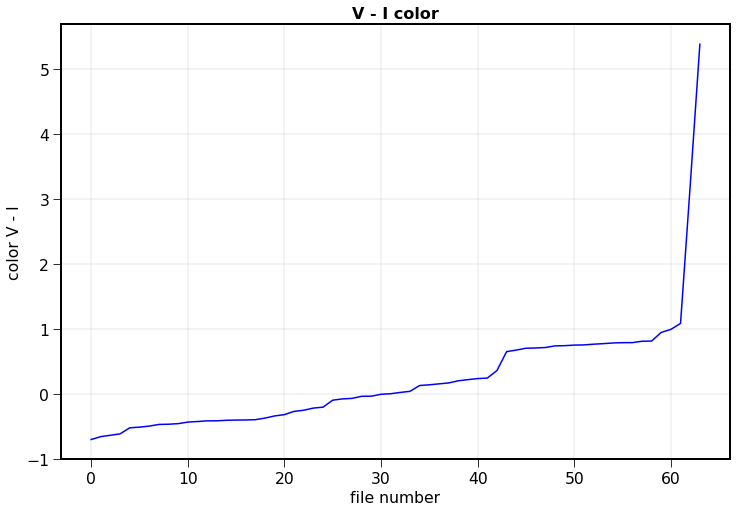

In [23]:
plt.plot(t["VmI"],"b-")
plt.grid()
plt.title("V - I color")
plt.xlabel("file number")
plt.ylabel("color V - I")

# Select a few stars with target colors

In [24]:
all_colors=t["VmI"]

In [25]:
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return a.flat[idx],int(idx)

In [26]:
# list of target colors
target_VmI=np.array([-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
NBVmItarget=len(target_VmI)

In [27]:
filesselected_index=np.zeros(NBVmItarget)
filesselected_VmI=np.zeros(NBVmItarget)

In [28]:
idx=0
for vmi in target_VmI:
    thevmi,theidx=find_nearest(all_colors,vmi)
    print(thevmi,theidx)
    filesselected_index[idx]=int(theidx)
    filesselected_VmI[idx]=thevmi
    idx+=1  

-0.6965962447104701 0
-0.5060116298442292 5
-0.2456967884279848 22
0.0 30
0.24880401434274013 41
0.36564197139039134 42
0.748126068457081 49
0.9987431194359893 60


In [29]:
filesselected_index

array([ 0.,  5., 22., 30., 41., 42., 49., 60.])

In [30]:
filesselected_VmI

array([-0.69659624, -0.50601163, -0.24569679,  0.        ,  0.24880401,
        0.36564197,  0.74812607,  0.99874312])

In [31]:
t_selected=Table(t[0])
for idx in filesselected_index[1:]:
    t_selected.add_row(t[int(idx)])

In [32]:
t_selected.show_in_notebook()

idx,OBJNAME,RA,DEC,SP_TYPE,SP_QUAL,magU,magB,magV,magR,magI,FILES,calcU,calcB,calcV,calcR,calcI,factor,VmI
0,NGC7293,337.411,-20.837,DAO.5,C,11.894,13.158,13.524,13.689,13.898,ngc7293_005.fits,11.917,13.180,13.538,13.734,14.234,26.01,-0.697
1,G93-48,328.106,2.389,DA2.8,C,11.942,12.732,12.743,12.839,12.938,g93_48_004.fits,11.982,12.717,12.728,12.836,13.234,12.34,-0.506
2,HZ4,58.842,9.788,DA3.4,C,13.917,14.592,14.506,14.580,14.642,hz4_stis_007.fits,13.923,14.587,14.472,14.561,14.718,61.484,-0.246
3,HD172167,279.235,38.784,A0Va,C,0.030,0.030,0.030,0.070,0.100,alpha_lyr_stis_010.fits,0.000,0.000,0.000,0.000,0.000,0.0001,0.000
4,HD163466,268.106,60.396,A2,E,--,7.040,6.850,--,--,hd163466_stis_005.fits,7.143,7.023,6.831,6.685,6.582,0.05399,0.249
5,HD101452,175.057,-39.147,A2/3(m)A8-F2,E,--,7.840,8.200,--,--,hd101452_stis_002.fits,7.898,7.809,7.508,7.289,7.142,0.10073,0.366
6,HD106252,183.373,10.042,G0,E,--,8.000,--,7.000,--,hd106252_stis_005.fits,8.101,8.007,7.394,6.948,6.646,0.090687,0.748
7,FLAT,0.000,0.000,flat,0,9.721,10.369,10.000,9.501,9.001,flat,9.721,10.369,10.000,9.501,9.001,1,0.999


# Save selected stars sample

In [33]:
t_selected.write('table_summary_selectedcalspec.fits', overwrite=True)  